<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Merge-rows-with-same-book_id-and-movie_id." data-toc-modified-id="Merge-rows-with-same-book_id-and-movie_id.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Merge rows with same <code>book_id</code> and <code>movie_id</code>.</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Books-explorations" data-toc-modified-id="Books-explorations-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Books explorations</a></span></li><li><span><a href="#Movies-EDA" data-toc-modified-id="Movies-EDA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Movies EDA</a></span></li></ul></li></ul></div>

In [581]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import requests

from collections import Counter

In [770]:
InteractiveShell.ast_node_interactivity = 'all'

ValueError: Interactivity was 'single'

ERROR! Session/line number was not unique in database. History logging moved to new session 87


In [770]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

%matplotlib inline
plt.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "last_expr"

%config InlineBackend.figure_format ='retina'

ValueError: Interactivity was 'single'

ERROR! Session/line number was not unique in database. History logging moved to new session 86


In [269]:
books = pd.read_csv('data/books.csv')
movies = pd.read_csv('data/movies.csv')

In [207]:
books.head()

,book_id,author,book_title,book_wiki_url,count,adaptations,isbn,oclc,valid_identifier,metadata_updated,number_of_pages,subject_places,subjects,publish_date,publish_places,goodreads,gc_title,gc_language_code,gc_average_rating,gc_format,gc_ratings_count,gc_text_reviews_count,title,gc_authors
0,b_9780385007511_848489,Stephen King,'Salem's Lot,https://en.wikipedia.org/wiki/%27Salem%27s_Lot,0,[],9780385007511,848489,True,True,427.0,"['Maine', 'U.S.A.', ""Jerusalem's Lot"", 'Marste...","['Catholic Church', 'arson', 'Great Depression...",1976,['New York'],1589604.0,Salem's Lot,en-US,4.01,Hardcover,443.0,65.0,'salem's Lot,NaN
1,b_0684819066_38377745,NaN,A Beautiful Mind_(book),https://en.wikipedia.org/wiki/A Beautiful Mind...,1,['A Beautiful Mind'],0684819066,38377745,True,True,459.0,['United States'],"['Mathematicians', 'Biography']",1998,['New York'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,A beautiful mind,NaN
2,b_0434098000_4205836,Anthony Burgess,A Clockwork Orange (novel),https://en.wikipedia.org/wiki/A_Clockwork_Oran...,0,[],0434098000,4205836,True,True,195.0,"['England', 'Korova Milk Bar']","['Internet Archive Wishlist', 'bible', 'aversi...",1962,['London'],101194.0,A Clockwork Orange,eng,3.99,Hardcover,142.0,17.0,A clockwork orange,NaN
3,b_0434098000_4205836,Anthony Burgess,A Clockwork Orange_(novel),https://en.wikipedia.org/wiki/A Clockwork Oran...,1,['A Clockwork Orange'],0434098000,4205836,True,True,195.0,"['England', 'Korova Milk Bar']","['Internet Archive Wishlist', 'bible', 'aversi...",1962,['London'],101194.0,A Clockwork Orange,eng,3.99,Hardcover,142.0,17.0,A clockwork orange,NaN
4,b_0064433390_30559641,William Joyce,A Day with Wilbur Robinson,https://en.wikipedia.org/wiki/A_Day_with_Wilbu...,0,[],0064433390,30559641,True,True,32.0,NaN,"['In library', 'Humorous stories']","September 30, 1993",NaN,566625.0,A Day with Wilbur Robinson,NaN,4.03,Paperback,647.0,81.0,A Day with Wilbur Robinson,NaN


In [208]:
movies.head()

,movie_id,movie_title,book_title,imdb_no,usable,isbn,oclc,imdb_title,imdb_actors,imdb_writers,imdb_genres,imdb_year,imdb_rated,imdb_released,imdb_runtime,imdb_imdbrating,imdb_imdbvotes,metadata_updated,book_id,budget,gross_usa,cumulative_worldwide_gross,opening_weekend_usa
0,m_9780385007511_848489_tt0355987,'Salem's Lot (2004 TV miniseries),'Salem's Lot,tt0355987,True,9.780385e+12,848489,Salem's Lot,"['rob lowe', 'andre braugher', 'donald sutherl...",['n/a'],"['drama', 'horror', 'mystery', 'thriller']",2004,TV-14,20 Jun 2004,181 min,6.2,"9,045",True,b_9780385007511_848489,25000000.0,NaN,NaN,NaN
1,m__470015866_tt0048918,1984 (1956 film),Nineteen Eighty-Four,tt0048918,True,NaN,470015866,1984,"[""edmond o'brien"", 'michael redgrave', 'jan st...","['george orwell', 'william templeton', 'ralph ...","['drama', 'sci-fi']",1956,Not Rated,01 Sep 1956,90 min,7.0,"2,779",True,b__470015866,NaN,NaN,NaN,NaN
2,m_0060250488__tt0202179,ABC Afterschool Special,Freaky Friday,tt0202179,True,6.025049e+07,NaN,ABC Afterschool Specials,"['lance kerwin', 'samaria graham', 'mara hobel...",['guy fraumeni'],"['adventure', 'comedy', 'drama']",1972–1997,NaN,04 Oct 1972,60 min,6.9,611,True,b_0060250488_,NaN,NaN,NaN,NaN
3,m_0434098000_4205836_tt0066921,A Clockwork Orange (film),A Clockwork Orange (novel),tt0066921,True,4.340980e+08,4205836,A Clockwork Orange,"['malcolm mcdowell', 'patrick magee', 'michael...","['stanley kubrick', 'anthony burgess']","['crime', 'drama', 'sci-fi']",1971,R,02 Feb 1972,136 min,8.3,"691,997",True,b_0434098000_4205836,2200000.0,26589355.0,NaN,NaN
4,m_0486440885__tt0061270,A Journey to the Center of the Earth (1993),Voyage au centre de la Terre,tt0061270,True,4.864409e+08,NaN,Journey to the Center of the Earth,"['ted knight', 'pat harrington jr.', 'jane webb']",['n/a'],"['animation', 'family', 'fantasy']",1967–1969,NaN,09 Sep 1967,30 min,7.8,67,True,b_0486440885_,NaN,NaN,NaN,NaN


## Data cleaning

In [270]:
books = books.applymap(lambda c:c.lower().strip() if type(c) == str else c)
movies = movies.applymap(lambda c:c.lower().strip() if type(c) == str else c)

In [210]:
books.shape
movies.shape

(769, 24)

(660, 23)

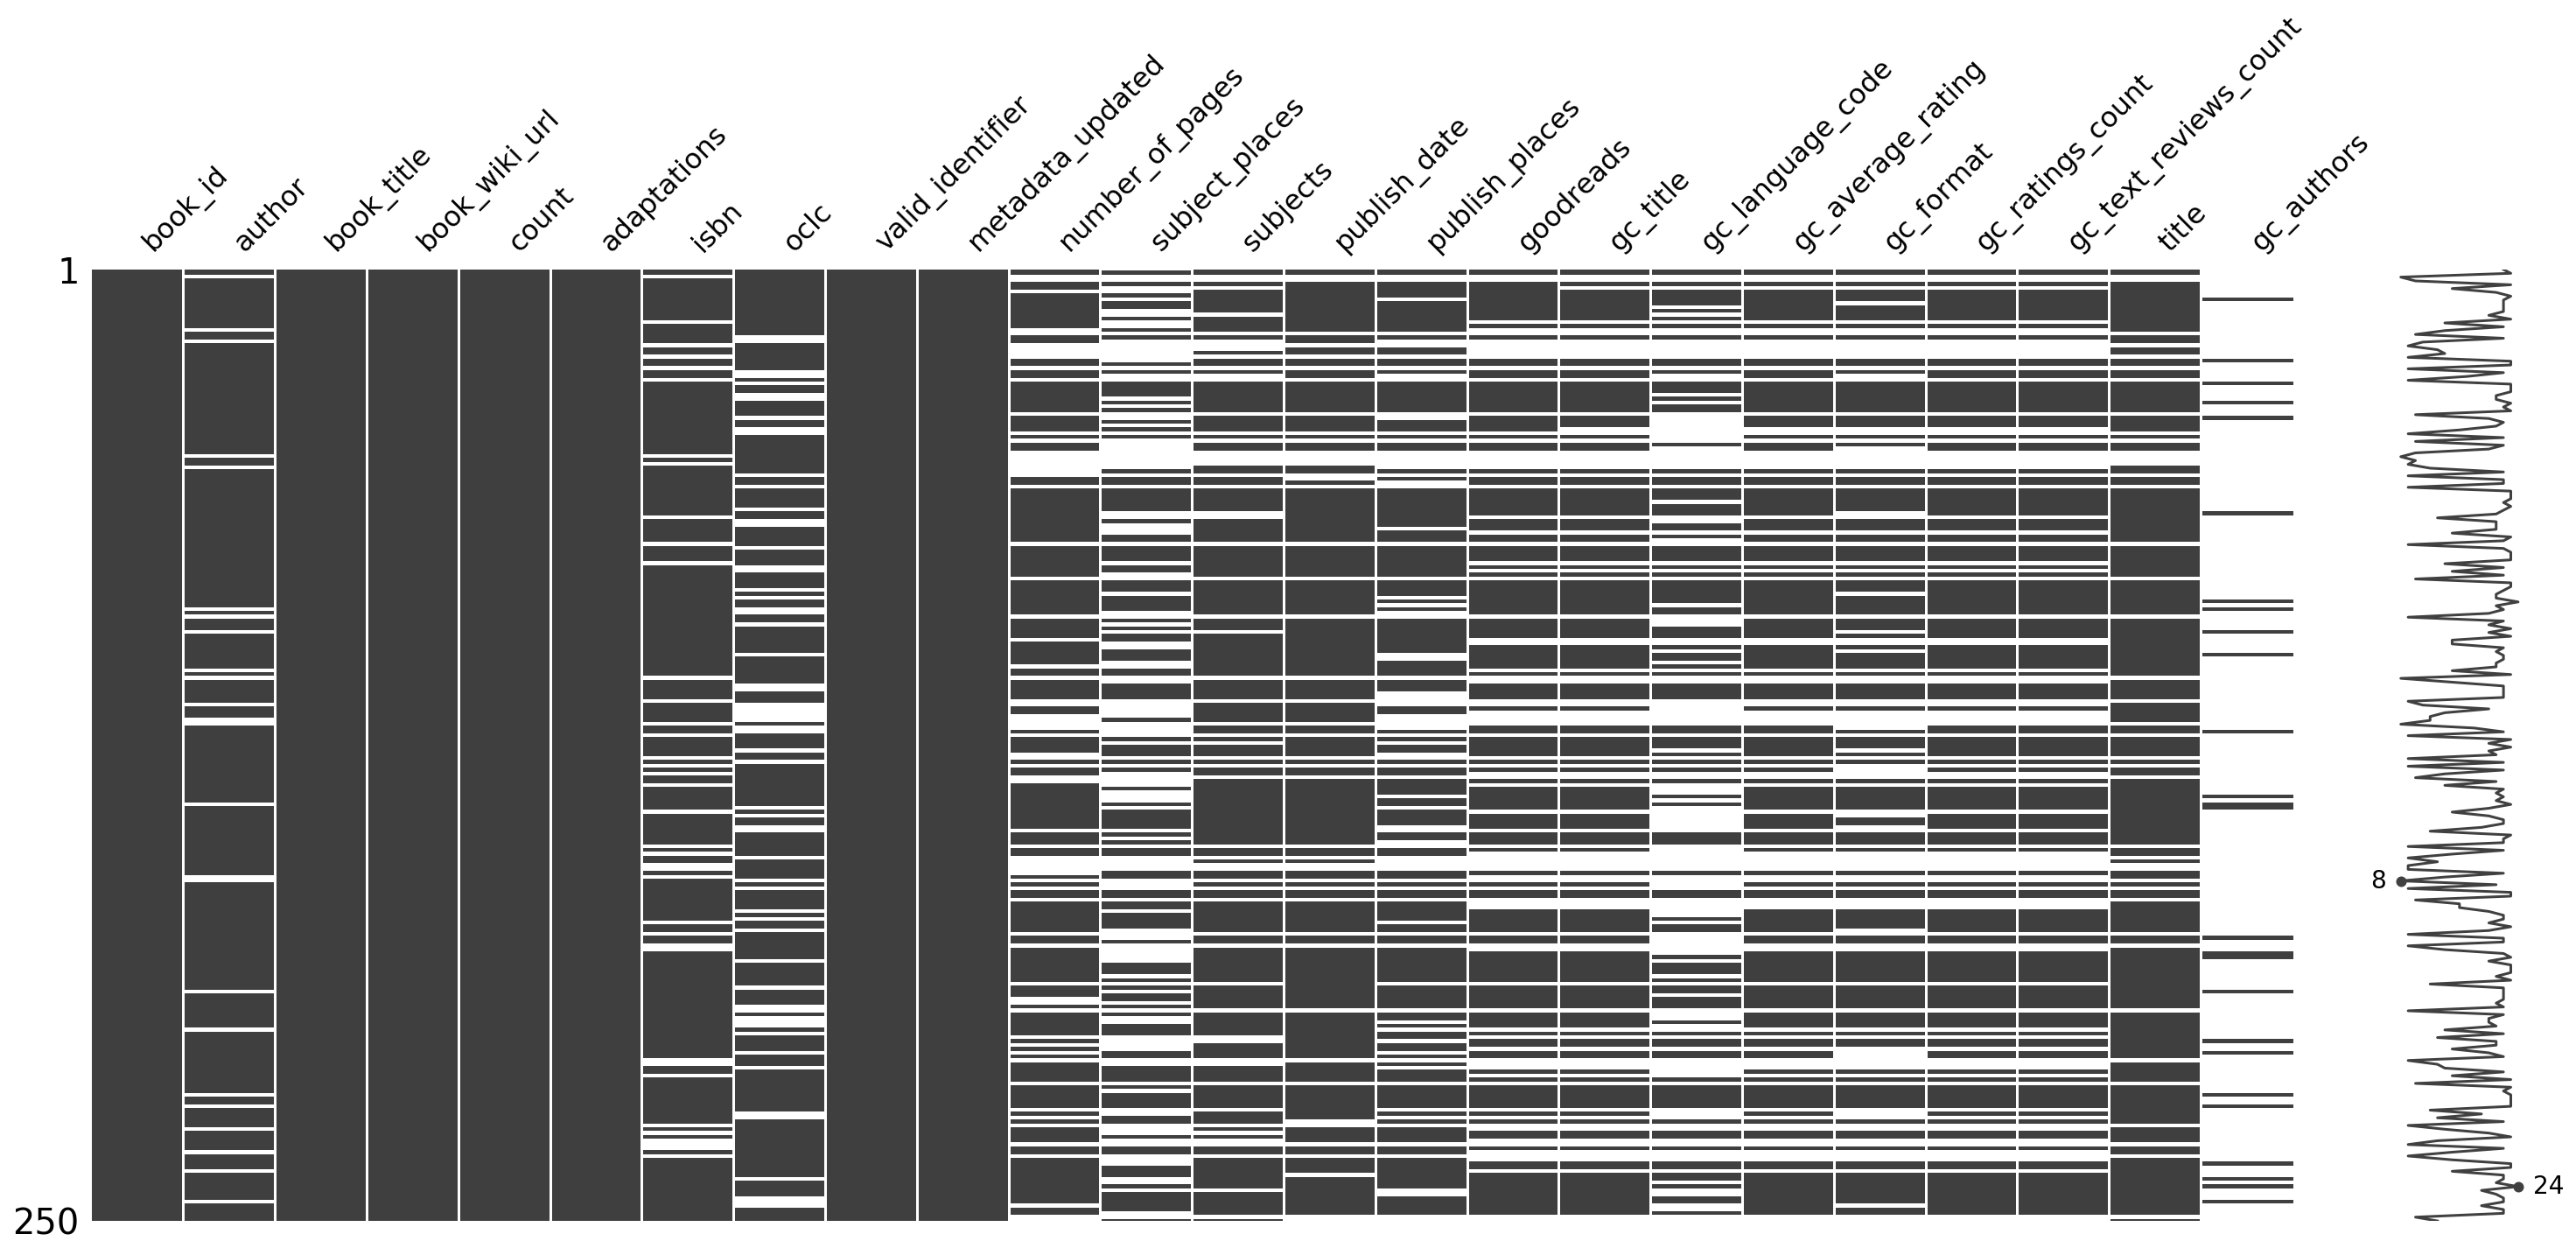

In [211]:
msno.matrix(books.sample(250))

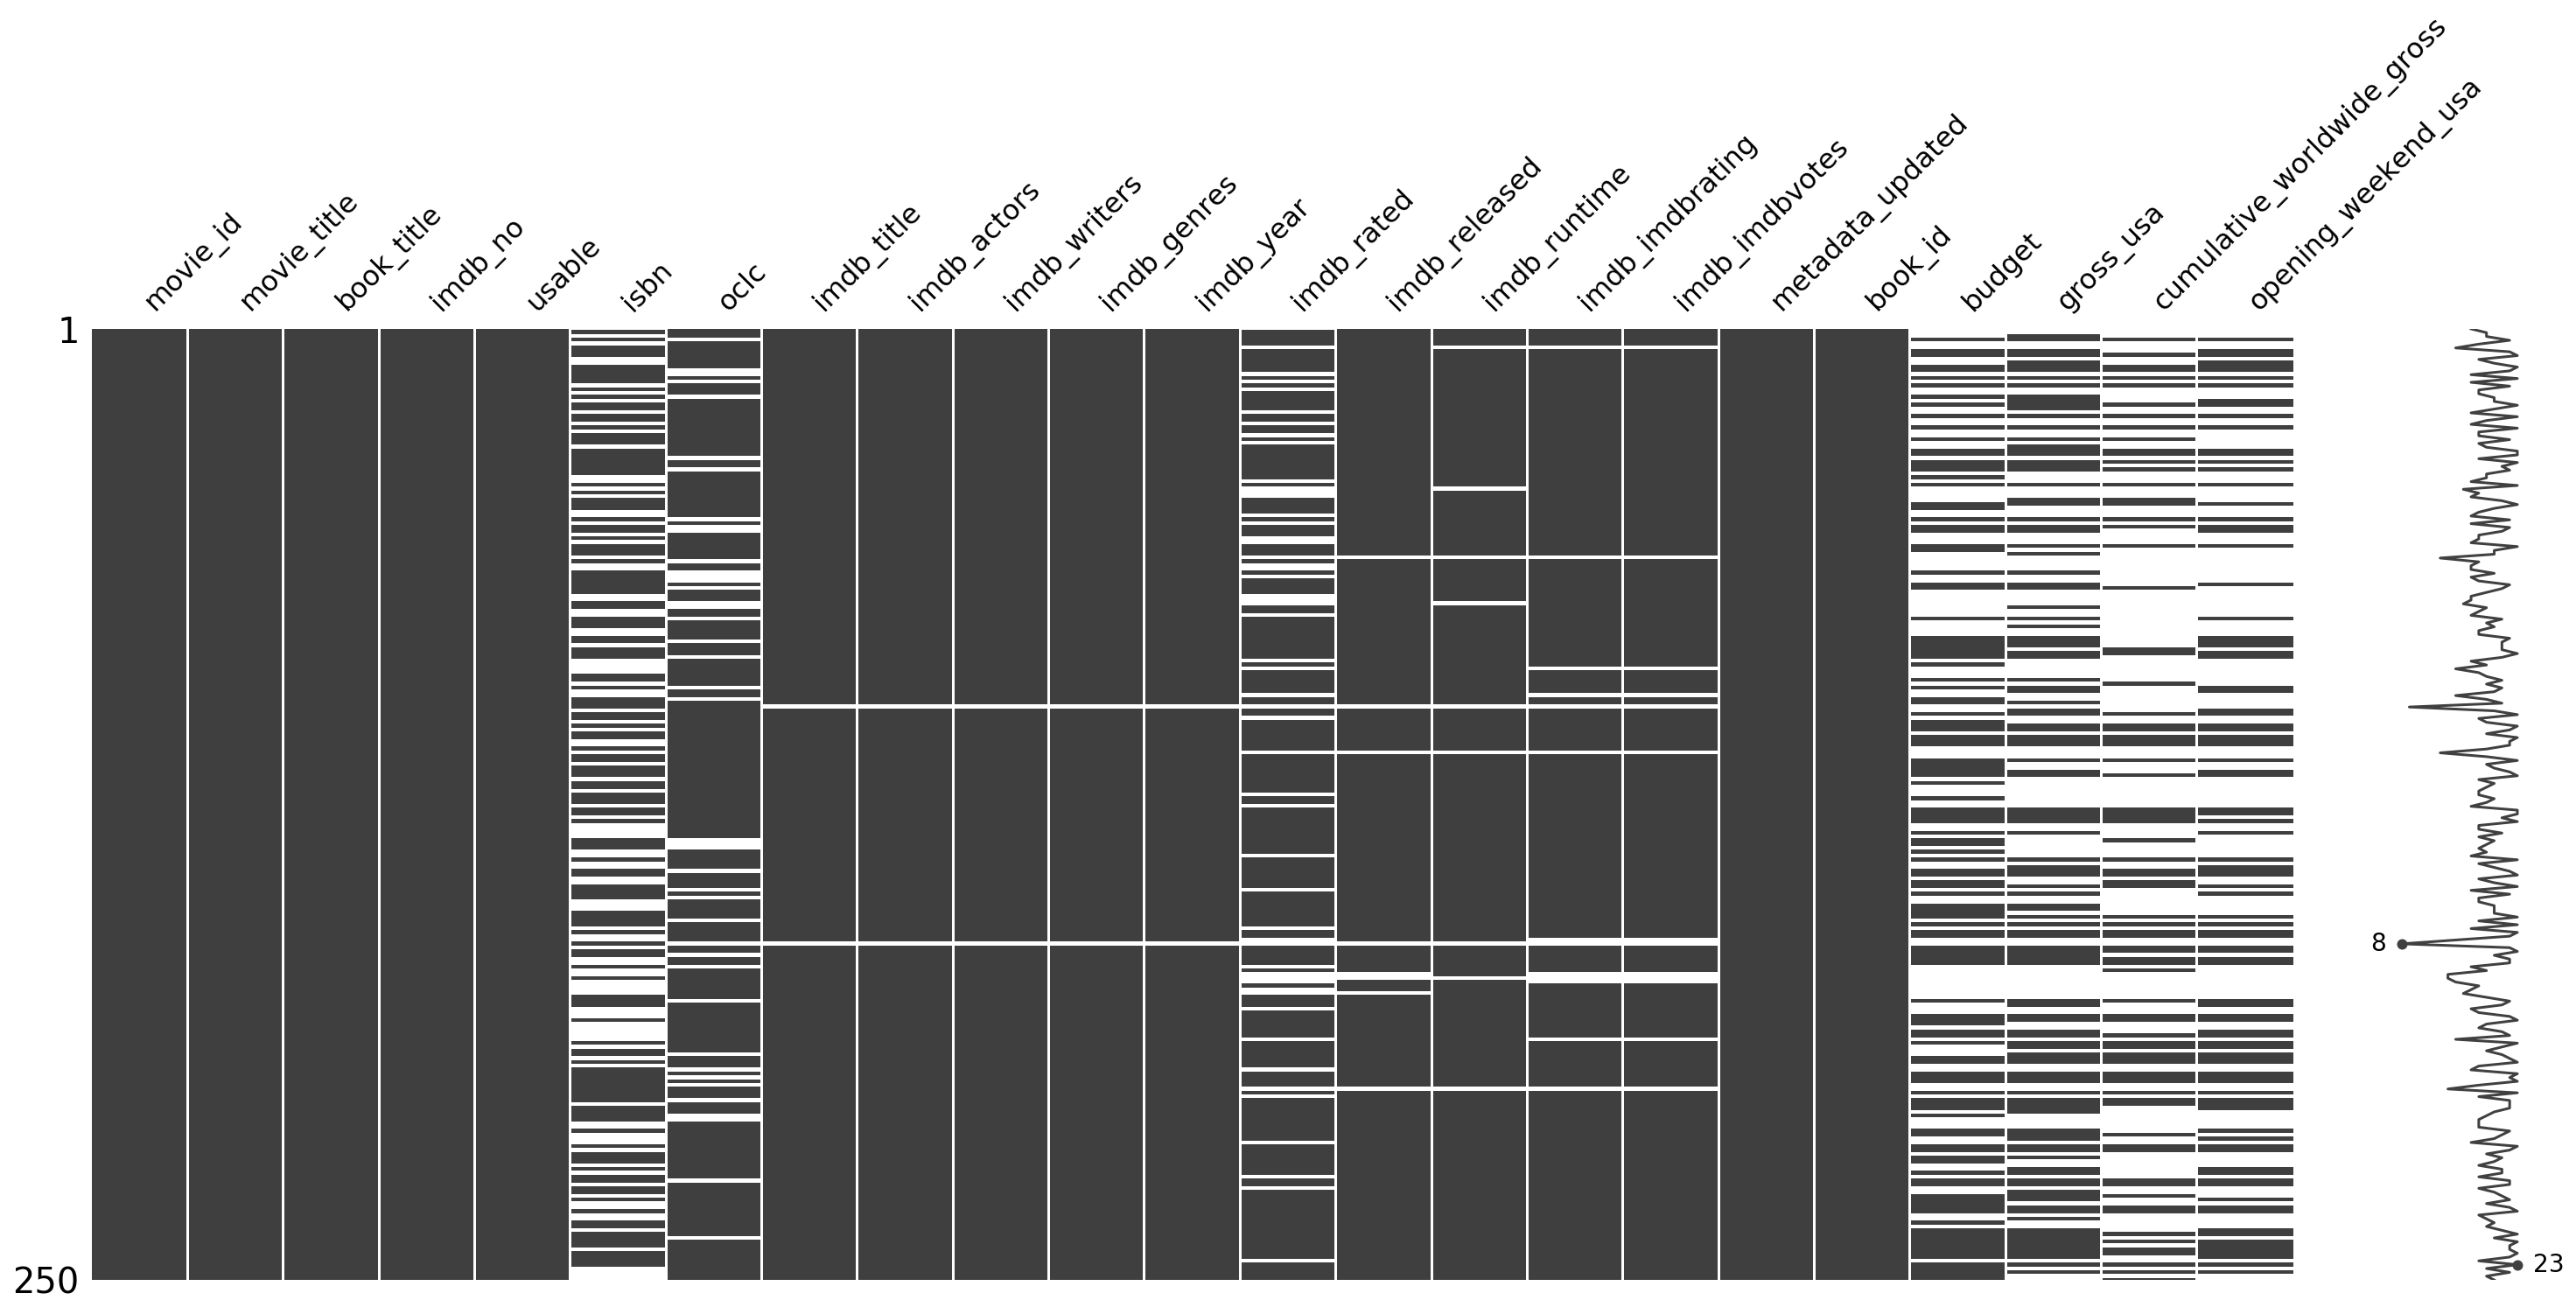

In [212]:
msno.matrix(movies.sample(250))

In [213]:
def get_dtype_summary(df):
    x = pd.DataFrame(df.dtypes, columns=['dtype']).rename_axis('keys')
    y = pd.DataFrame(df.isnull().sum(), columns= ['null_count']).rename_axis('keys')
    z = pd.DataFrame(df.count(), columns = ['non_null_count']).rename_axis('keys')
    x = x.merge(y.merge(z, on = 'keys'), on = 'keys')
    print(x)

In [214]:
get_dtype_summary(books)

                         dtype  null_count  non_null_count
keys                                                      
book_id                 object           0             769
author                  object          63             706
book_title              object           0             769
book_wiki_url           object           1             768
count                    int64           0             769
adaptations             object           0             769
isbn                    object         141             628
oclc                    object         189             580
valid_identifier          bool           0             769
metadata_updated          bool           0             769
number_of_pages        float64         264             505
subject_places          object         434             335
subjects                object         237             532
publish_date            object         195             574
publish_places          object         302             4

In [215]:
get_dtype_summary(movies)

                              dtype  null_count  non_null_count
keys                                                           
movie_id                     object           0             660
movie_title                  object           0             660
book_title                   object           0             660
imdb_no                      object           0             660
usable                         bool           0             660
isbn                        float64         278             382
oclc                         object         138             522
imdb_title                   object           6             654
imdb_actors                  object           6             654
imdb_writers                 object           6             654
imdb_genres                  object           6             654
imdb_year                    object           6             654
imdb_rated                   object         164             496
imdb_released                object     

In [271]:
nan_to_string = ['author', 'isbn', 'oclc', 'title', 'imdb_rated', 'imdb_runtime']

for col_name in nan_to_string:
    try:
        books[col_name][books[col_name].isnull()] = ''
        movies[col_name][movies[col_name].isnull()] = ''
    except KeyError:
        pass

/Users/chan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/chan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/chan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/chan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying 

### Merge rows with same `book_id` and `movie_id`.

In [216]:
sum(books['book_id'].value_counts() > 1), sum(
    movies['movie_id'].value_counts() > 1)

(83, 45)

In [221]:
books['book_id'].value_counts()[:7]
movies['movie_id'].value_counts()[:7]

b_0312355297_                3
b_0060254920_225496          2
b__848975                    2
b__37505041                  2
b__38659585                  2
b_9780307931894_972369283    2
b__7207376                   2
Name: book_id, dtype: int64

m__53071567_tt0857480              14
m__18798256_tt3256204               5
m__9506808_tt0001463                4
m_1557486603_33897078_tt0035942     3
m_3522128001_7460007_tt0088323      3
m__8462789_tt0031385                3
m_0060250488__tt0076054             2
Name: movie_id, dtype: int64

In [225]:
books.loc[books['book_id'] == 'b_9780307931894_972369283']
movies.loc[movies['movie_id'] == 'm__53071567_tt0857480'][:4]

,book_id,author,book_title,book_wiki_url,count,adaptations,isbn,oclc,valid_identifier,metadata_updated,number_of_pages,subject_places,subjects,publish_date,publish_places,goodreads,gc_title,gc_language_code,gc_average_rating,gc_format,gc_ratings_count,gc_text_reviews_count,title,gc_authors
171,b_9780307931894_972369283,david levithan,every day (novel),https://en.wikipedia.org/wiki/every_day_(novel),0,[],9780307931894,972369283,True,True,NaN,NaN,"['interpersonal relations', 'fiction', 'love',...",2012,['new york'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,every day,NaN
172,b_9780307931894_972369283,NaN,every day_(novel),https://en.wikipedia.org/wiki/every day_(novel),1,['every day'],9780307931894,972369283,True,True,NaN,NaN,"['interpersonal relations', 'fiction', 'love',...",2012,['new york'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,every day,NaN


,movie_id,movie_title,book_title,imdb_no,usable,isbn,oclc,imdb_title,imdb_actors,imdb_writers,imdb_genres,imdb_year,imdb_rated,imdb_released,imdb_runtime,imdb_imdbrating,imdb_imdbvotes,metadata_updated,book_id,budget,gross_usa,cumulative_worldwide_gross,opening_weekend_usa
10,m__53071567_tt0857480,adaptations of the picture of dorian gray (1917),the picture of dorian gray,tt0857480,True,NaN,53071567,the picture of dorian gray,"['john bailey', 'raymond barry', 'jeremy brett...",['oscar wilde'],['drama'],1961,NaN,22 jan 1961,60 min,NaN,NaN,True,b__53071567,NaN,NaN,NaN,NaN
11,m__53071567_tt0857480,adaptations of the picture of dorian gray (2001),the picture of dorian gray,tt0857480,True,NaN,53071567,the picture of dorian gray,"['john bailey', 'raymond barry', 'jeremy brett...",['oscar wilde'],['drama'],1961,NaN,22 jan 1961,60 min,NaN,NaN,True,b__53071567,NaN,NaN,NaN,NaN
12,m__53071567_tt0857480,adaptations of the picture of dorian gray (2004),the picture of dorian gray,tt0857480,True,NaN,53071567,the picture of dorian gray,"['john bailey', 'raymond barry', 'jeremy brett...",['oscar wilde'],['drama'],1961,NaN,22 jan 1961,60 min,NaN,NaN,True,b__53071567,NaN,NaN,NaN,NaN
13,m__53071567_tt0857480,adaptations of the picture of dorian gray (1910),the picture of dorian gray,tt0857480,True,NaN,53071567,the picture of dorian gray,"['john bailey', 'raymond barry', 'jeremy brett...",['oscar wilde'],['drama'],1961,NaN,22 jan 1961,60 min,NaN,NaN,True,b__53071567,NaN,NaN,NaN,NaN


Row merge

In [314]:
books = books[books['book_id'] != 'b_broken_broken']

In [315]:
#SAVE
books_s1 = books.copy(deep=True)
movies_s1 = movies.copy(deep=True)

In [300]:
#run only is necessary
books = books_s1.copy(deep=True)
movies = movies_s1.copy(deep=True)

In [355]:
def row_search(df, col, query, condensed = False):
    
    
    if condensed is False:
        return df[df[col] == query]
    else:
        if id(df) == id(books):
            book_id = df[df[col] == query]['book_id'][1]
            title = df[df[col] == query]['book_title'][1]
            author = df[df[col] == query]['author'][1]
            
            return {'book_id': book_id, 'title': title, 'author': author}
        else:
            movie_id = df[df[col] == query]['movie_id'][1]
            movie_title = df[df[col] == query]['movie_title'][1]
            book_title = df[df[col] == query]['book_title'][1]
            
            return {'movie_id': movie_id, 'movie_title': movie_title, 'book_title': book_title}

In [359]:
books.columns

Index(['book_id', 'author', 'book_title', 'book_wiki_url', 'count', 'adaptations', 'isbn', 'oclc', 'valid_identifier', 'metadata_updated', 'number_of_pages', 'subject_places', 'subjects', 'publish_date', 'publish_places', 'goodreads', 'gc_title', 'gc_language_code', 'gc_average_rating', 'gc_format', 'gc_ratings_count', 'gc_text_reviews_count', 'title', 'gc_authors'], dtype='object')

In [356]:
x = row_search(books, 'book_id', 'b_0684819066_38377745', True)
x

{'book_id': 'b_0684819066_38377745',
 'title': 'a beautiful mind_(book)',
 'author': ''}

In [377]:
for book_id in books.loc[books['author'] == ''].items():
    try:
        a = book_id
        break
        #print(row_search(books, 'book_id', book_id[1], True))
    except TypeError:
        pass
        #print('error', book_id)

a

('book_id', 1          b_0684819066_38377745
 25                    b__295972o
 77              b_9781407124261_
 81                     b__964700
 86          b_0690013590_2818232
 92         b_0374299218_66463617
 97     b_9780545227247_288932790
 100                   b__9318922
 104    b_9780007286249_310154424
 105         b_0399116974_1975222
 107                 b__427190610
 114             b_9781416975861_
 148       b_0062024027_769412945
 153                   b__1447002
 172    b_9780307931894_972369283
 181        b_0679785892_41049769
 187    b_9781612130286_780307033
 200        b_0671825313_21616361
 211                  b__42623358
 227                 b_074754624_
 228                b_0747581088_
 229                b_0747551006_
 245          b_0394800796_178325
 248                b_0061969559_
 250                  b__24724940
 262       b_0062234935_794210765
 271                   b__3163777
 295                b_0312355297_
 297                b_0312355297_
 30

In [279]:
books = books.groupby(['book_id']).agg('max').reset_index()
movies = movies.groupby(['movie_id']).agg('max').reset_index()

sum(books['book_id'].value_counts() > 1), sum(movies['movie_id'].value_counts() > 1)

books.loc[books['book_id'] == 'b_074754624_']

(83, 0)

,book_id,author,book_title,book_wiki_url,count,adaptations,isbn,oclc,valid_identifier,metadata_updated,number_of_pages,subject_places,subjects,publish_date,publish_places,goodreads,gc_title,gc_language_code,gc_average_rating,gc_format,gc_ratings_count,gc_text_reviews_count,title,gc_authors
227,b_074754624_,,harry potter and the goblet of fire,https://en.wikipedia.org/wiki/harry potter and...,1,['harry potter and the goblet of fire'],074754624,,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN


In [285]:
code = '9780385738750'
curl = 'https://openlibrary.org/api/books?bibkeys=ISBN:{}&jscmd=data&format=json'.format(code)
all_metadata = requests.get(curl).json()
all_metadata

{'ISBN:9780385738750': {'publishers': [{'name': 'Delacorte Press'}],
  'pagination': 'p. cm.',
  'subtitle': 'The',
  'title': 'The Scorch Trials',
  'url': 'https://openlibrary.org/books/OL24816050M/The_Scorch_Trials',
  'classifications': {'dewey_decimal_class': ['[Fic]'],
   'lc_classifications': ['PZ7.D2587 Sc 2010']},
  'notes': 'Sequel to: The maze runner.',
  'identifiers': {'isbn_13': ['9780385738750',
    '9780385907453',
    '9780375896118'],
   'lccn': ['2010021189'],
   'openlibrary': ['OL24816050M']},
  'cover': {'small': 'https://covers.openlibrary.org/b/id/7281042-S.jpg',
   'large': 'https://covers.openlibrary.org/b/id/7281042-L.jpg',
   'medium': 'https://covers.openlibrary.org/b/id/7281042-M.jpg'},
  'subjects': [{'url': 'https://openlibrary.org/subjects/science_fiction',
    'name': 'Science fiction'},
   {'url': 'https://openlibrary.org/subjects/survival', 'name': 'Survival'},
   {'url': 'https://openlibrary.org/subjects/fiction', 'name': 'Fiction'}],
  'publish_dat

In [725]:
try:
    books['gc_text_reviews_count'] = books['gc_text_reviews_count'] + 1
    books['publish_date'] = pd.to_datetime(books['publish_date'])
    books['publish_year'] = books['publish_date'].dt.year.astype('int')
    
    movies['imdb_released'] = pd.to_datetime(movies['imdb_released'])
    movies['imdb_year'] = pd.to_datetime(movies['imdb_year'].dt.year)
except ValueError:
    pass

try:
    books.drop(columns=['book_wiki_url', 'adaptations', 'title', 'gc_title', 'publish_date'], inplace = True)
except KeyError:
    pass

books.shape, movies.shape

((768, 21), (660, 23))

In [ ]:
book

## EDA

### Books explorations

In [705]:
books.columns

Index(['book_id', 'author', 'book_title', 'count', 'isbn', 'oclc', 'valid_identifier', 'metadata_updated', 'number_of_pages', 'subject_places', 'subjects', 'publish_date', 'publish_places', 'goodreads', 'gc_language_code', 'gc_average_rating', 'gc_format', 'gc_ratings_count', 'gc_text_reviews_count', 'gc_authors', 'publish_year'], dtype='object')

1.6768558951965065

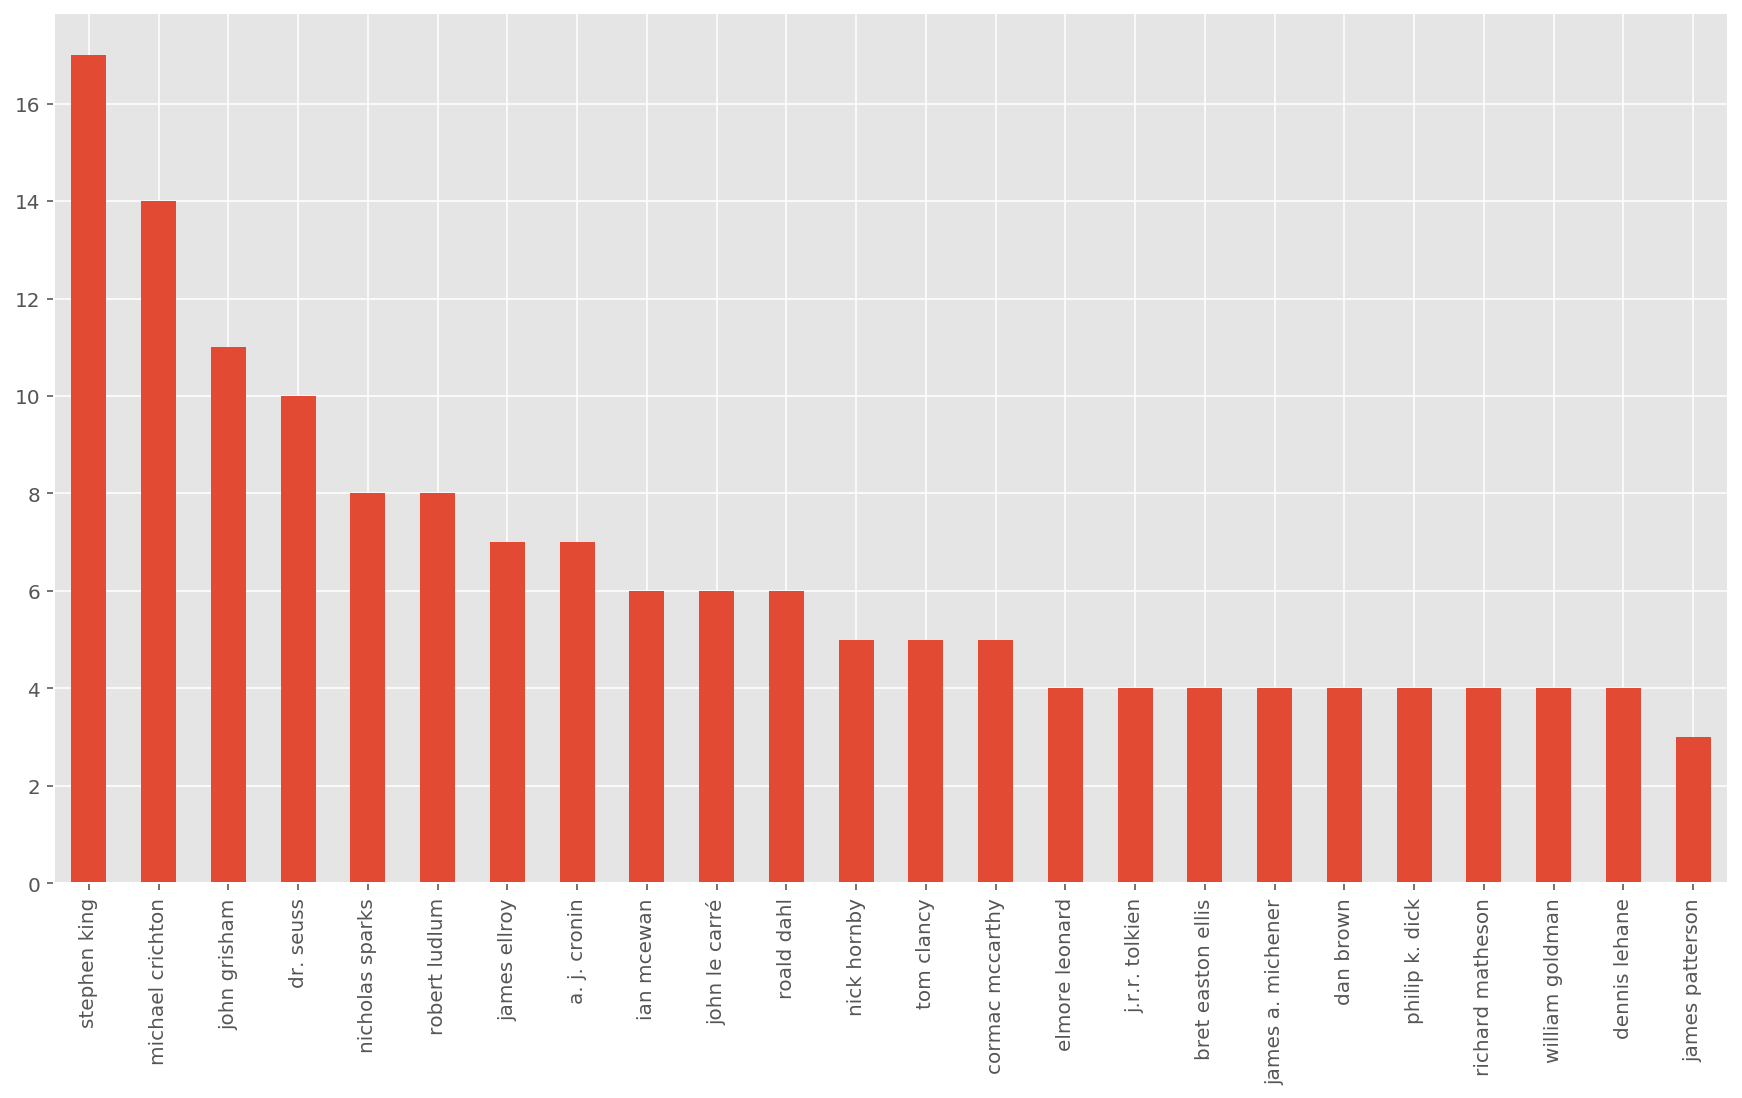

In [706]:
books['author'].value_counts()[1:25].plot(kind = 'bar', figsize = (15, 8))
np.mean(books['author'].value_counts())

316.75841584158417

153.41106706649472

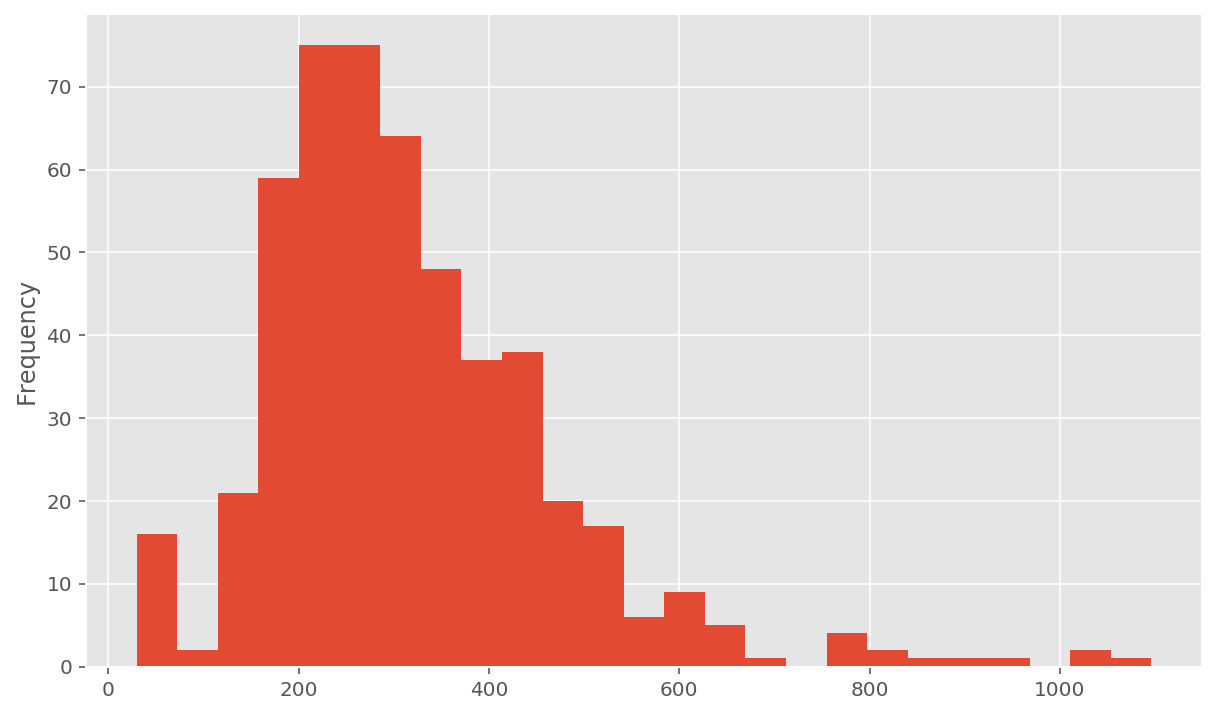

In [711]:
books['number_of_pages'].plot.hist(bins = 25, figsize = (10, 6))
np.nanmean(books['number_of_pages'])
np.nanstd([books['number_of_pages']])

1988.5592334494775

19.835626189040642

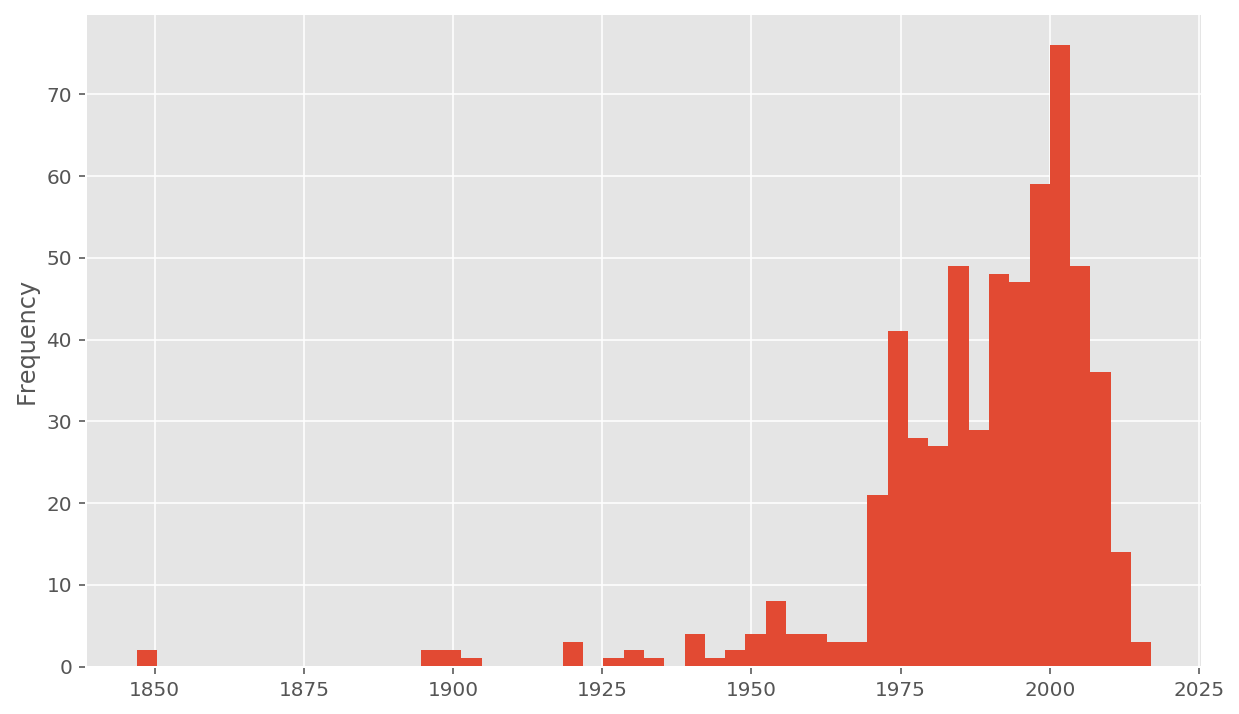

In [712]:
books['publish_year'].plot.hist(bins = 50, figsize = (10, 6))
np.nanmean(books['publish_year'])
np.nanstd(books['publish_year'])

In [506]:
books['gc_language_code'].value_counts()
books['gc_format'].value_counts()

eng      259
en-us     51
en-gb      8
ger        2
fre        1
Name: gc_language_code, dtype: int64

hardcover                264
paperback                123
mass market paperback     14
unknown binding            6
ebook                      3
library binding            1
Name: gc_format, dtype: int64

In [482]:
#TODO: find average good reads book rating

3.923870967741936

0.23906013216665087

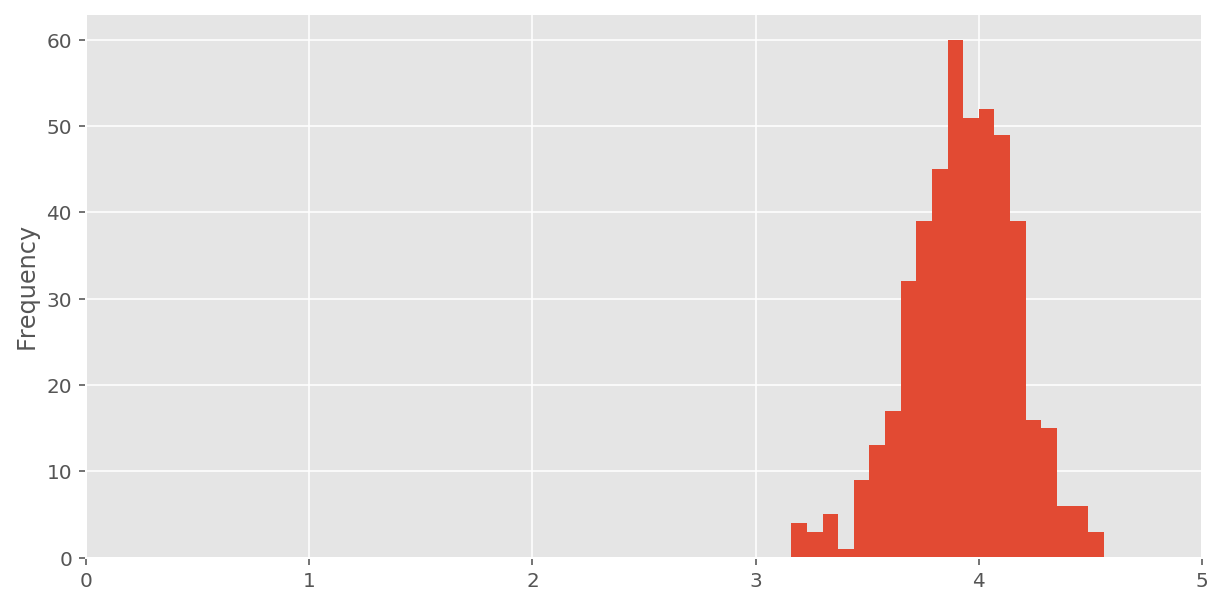

In [713]:
books['gc_average_rating'].plot.hist(bins = 20, figsize = (10, 5), xlim = [0, 5])
np.nanmean(books['gc_average_rating'])
np.nanstd(books['gc_average_rating'])

<Figure size 720x360 with 0 Axes>

(2, 5.5)

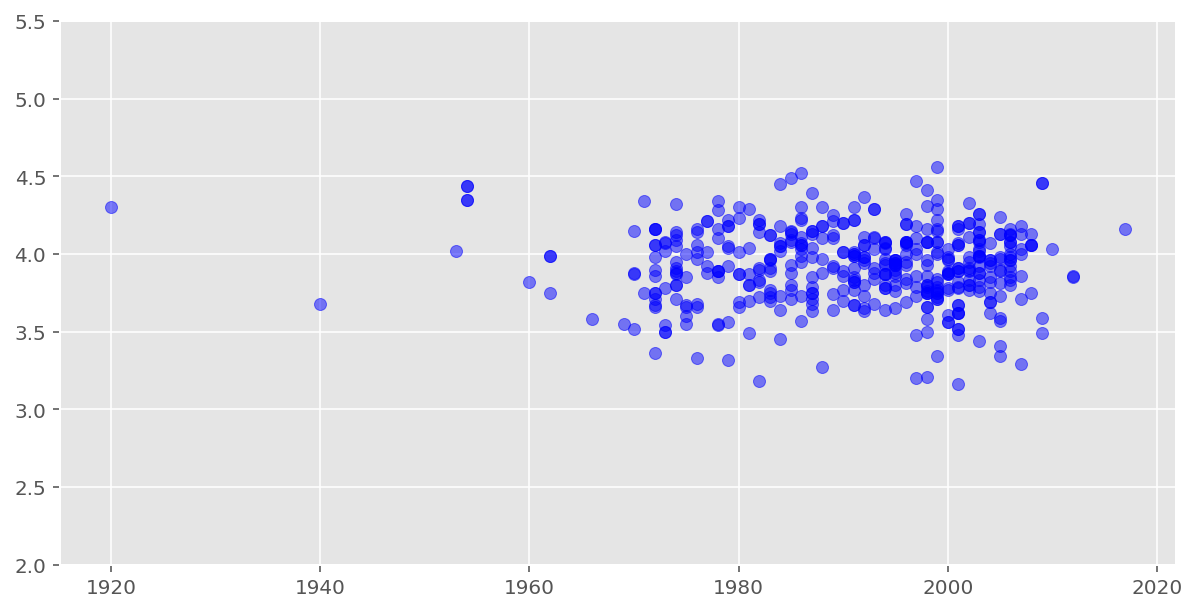

In [504]:
mean_rating = np.mean(books['gc_average_rating'])

plt.figure(figsize=(10, 5))
plt.scatter(x=books['publish_year'],
            y=books['gc_average_rating'],  alpha=0.5, c='blue')
plt.ylim(2, 5.5)
plt.show()

<Figure size 720x360 with 0 Axes>

Text(0, 0.5, 'Log of text reviews count')

Text(0.5, 1.0, 'Relationaship between log(text reviews) and publish year')

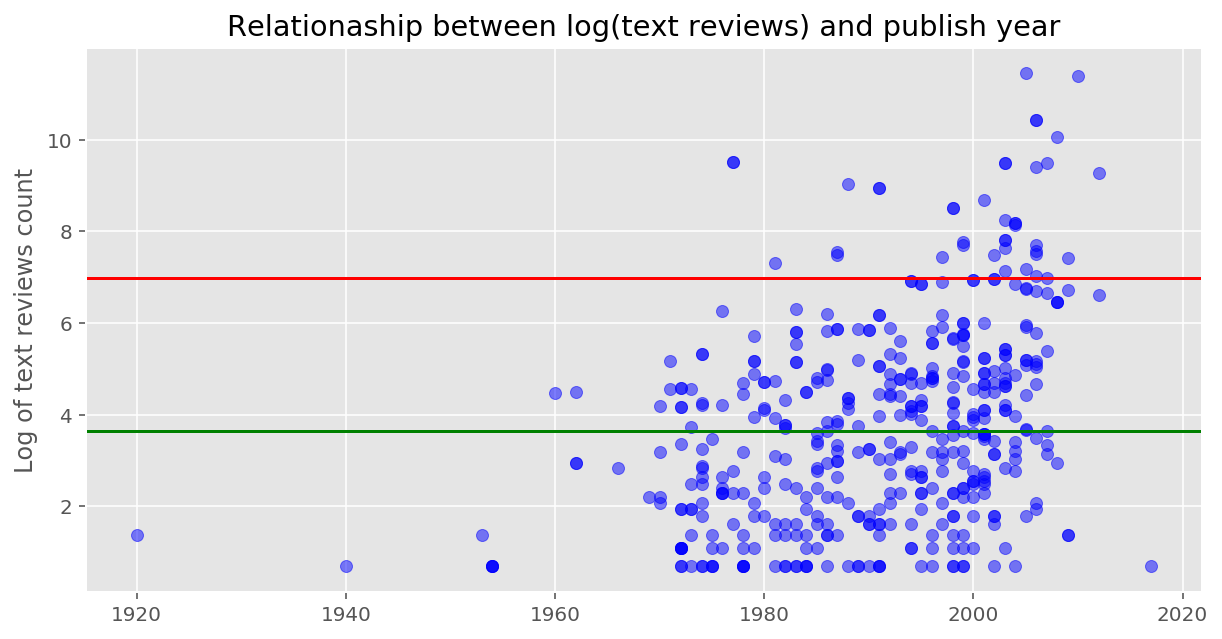

In [714]:
plt.figure(figsize=(10, 5))
plt.scatter(x=books['publish_year'],
            y=np.log(books['gc_text_reviews_count']),  alpha=0.5, c='blue')
plt.ylabel('Log of text reviews count')
plt.axhline(y = np.log(np.nanmean(books['gc_text_reviews_count'])), c = 'red')
plt.axhline(y = np.log(np.nanmedian(books['gc_text_reviews_count'])), c = 'green')
plt.title('Relationaship between log(text reviews) and publish year')
plt.show()


it seems that only the recent books are tagged, but there doesn't seem to be any sort of upwards trends in book ratings. --> people enjoy older books as much as newer books

<Figure size 720x360 with 0 Axes>

Text(0, 0.5, 'Log of text reviews count')

(2, 5)

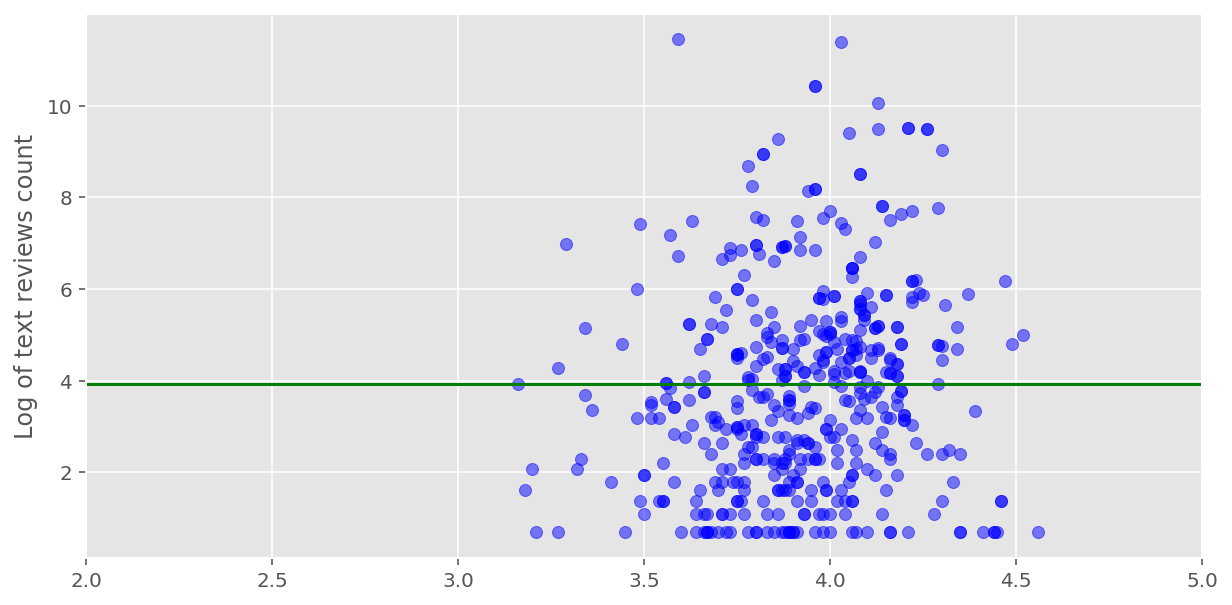

In [720]:
plt.figure(figsize=(10, 5))
plt.scatter(x=books['gc_average_rating'],
            y=np.log(books['gc_text_reviews_count']),  alpha=0.5, c='blue')
plt.axhline(y = np.nanmedian(books['gc_average_rating']), c = 'green')
plt.ylabel('Log of text reviews count')
plt.xlim(2, 5)
plt.show()

In [721]:
books.columns

Index(['book_id', 'author', 'book_title', 'count', 'isbn', 'oclc', 'valid_identifier', 'metadata_updated', 'number_of_pages', 'subject_places', 'subjects', 'publish_date', 'publish_places', 'goodreads', 'gc_language_code', 'gc_average_rating', 'gc_format', 'gc_ratings_count', 'gc_text_reviews_count', 'gc_authors', 'publish_year'], dtype='object')

In [703]:
sample = books.iloc[343]
sample
sample.subjects
sample.subject_places

book_id                                              b_0446531332_49576256
author                                                     nicholas sparks
book_title                                      nights in rodanthe (novel)
count                                                                    0
isbn                                                            0446531332
oclc                                                              49576256
valid_identifier                                                      True
metadata_updated                                                      True
number_of_pages                                                        212
subject_places           ['rodanthe (n.c.)', 'north carolina', 'carolin...
subjects                 ['divorced people', 'tempestades', 'popular pr...
publish_date                                           2002-01-01 00:00:00
publish_places                                            ['new york, ny']
goodreads                

"['divorced people', 'tempestades', 'popular print disabled books', 'directores de hoteles', 'divorciados', 'accessible book', 'hotelkeepers', 'storms', 'in library', 'fiction', 'romance', 'overdrive', 'notekeepers', 'protected daisy', 'ficción', 'internet archive wishlist', 'divorced people -- fiction', 'hotelkeepers -- fiction', 'storms -- fiction', 'rodanthe (n.c.) -- fiction', 'north carolina -- fiction']"

"['rodanthe (n.c.)', 'north carolina', 'carolina del norte']"

In [663]:
books_subjects = []
subject_places = []
publish_places = []
books_subjects_count = None

subjects_to_exclude = ['protected daisy', 'fiction', 'in library', 'accessible book',
                       'fiction', 'internet archive wishlist', 'large type books', 'in library',
                       'popular print disabled books', 'open library staff picks', 'ficción',
                       'fiction in english', 'accessible book', 'ficción juvenil', 'open_syllabus_project',
                       'overdrive']

for index in books[['publish_year', 'subjects', 'subject_places', 'publish_places']].itertuples():
    subjects = index.subjects
    if subjects is not None and isinstance(subjects, str):
        x = subjects.replace("'", '').replace('[', '').replace(']', '').replace('"', '')
        x = x.split(',')
        books_subjects += [subject.strip()
                           for subject in x if subject.strip() not in subjects_to_exclude]
        
    s_places = index.subject_places
    if s_places is not None and isinstance(s_places, str):
        x = s_places.replace("'", '').replace('[', '').replace(']', '').replace('"', '').replace('u.s.a.', 'usa')
        x = x.split(',')
        subject_places += [place.strip() for place in x]
        
    p_places = index.publish_places
    if p_places is not None and isinstance(p_places, str):
        x = p_places.replace("'", '').replace('[', '').replace(']', '').replace('"', '').replace('u.s.a.', 'usa')
        x = x.split(',')
        publish_places += [place.strip() for place in x]

books_subjects_count = Counter(books_subjects)
subject_places_count = Counter(subject_places)
publish_places_count = Counter(publish_places)

books_subjects_count.most_common(20)
subject_places_count.most_common(20)
publish_places_count.most_common(20)

[('juvenile fiction', 128),
 ('science fiction', 51),
 ('history', 46),
 ('literature', 41),
 ('fantasy', 40),
 ('detective and mystery stories', 35),
 ('childrens stories', 31),
 ('friendship', 30),
 ('thriller', 28),
 ('man-woman relationships', 28),
 ('new york times bestseller', 27),
 ('fantasy fiction', 25),
 ('women', 23),
 ('death', 22),
 ('historical fiction', 22),
 ('magic', 22),
 ('mystery', 19),
 ('schools', 19),
 ('murder', 19),
 ('young men', 18)]

[('united states', 61),
 ('england', 41),
 ('london', 18),
 ('california', 16),
 ('new york (n.y.)', 13),
 ('italy', 12),
 ('london (england)', 11),
 ('maine', 10),
 ('new york', 10),
 ('los angeles', 10),
 ('chicago', 10),
 ('massachusetts', 10),
 ('texas', 9),
 ('great britain', 9),
 ('new york (state)', 8),
 ('north carolina', 7),
 ('los angeles (calif.)', 7),
 ('georgia', 7),
 ('boston (mass.)', 7),
 ('mexico', 6)]

[('new york', 294),
 ('london', 82),
 ('usa', 37),
 ('boston', 28),
 ('n.y', 14),
 ('england', 10),
 ('garden city', 9),
 ('ny', 9),
 ('toronto', 7),
 ('n.y.', 5),
 ('philadelphia', 4),
 ('tōkyō', 3),
 ('cambridge', 3),
 ('mass', 3),
 ('chapel hill', 3),
 ('annapolis', 3),
 ('md', 3),
 ('me', 3),
 ('oxford', 2),
 ('u.s.a', 2)]

### Movies EDA

In [722]:
movies.columns

Index(['movie_id', 'movie_title', 'book_title', 'imdb_no', 'usable', 'isbn', 'oclc', 'imdb_title', 'imdb_actors', 'imdb_writers', 'imdb_genres', 'imdb_year', 'imdb_rated', 'imdb_released', 'imdb_runtime', 'imdb_imdbrating', 'imdb_imdbvotes', 'metadata_updated', 'book_id', 'budget', 'gross_usa', 'cumulative_worldwide_gross', 'opening_weekend_usa'], dtype='object')

In [770]:
x = pd.DataFrame(data=movies['imdb_year'].value_counts())
x['year'] = x.index
x = x[pd.to_numeric(x['year'], errors='coerce').notnull()]
x.set_index('year', inplace = True)
x.sort_index(inplace = True)
x.rename(columns = {'imdb_year': 'count'})
x.columns

ValueError: Interactivity was 'single'

In [770]:
print('ha')

ERROR! Session/line number was not unique in database. History logging moved to new session 88


ValueError: Interactivity was 'single'